In [96]:
# reference: Diving into deep learning course
# Practice
!pip install d2l

In [97]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

## Random generate small data
true $w = [2, -3.4]^T, b = 4.2$

$y = Xw + b + \epsilon$

In [98]:
def synthetic_data(w, b, num_examples):
  # Y = X*W + b
  X = torch.normal(0, 1, (num_examples, len(w)))
  y = torch.matmul(X, w) + b
  y += torch.normal(0, 0.01, y.shape)  # add noise
  return X, y.reshape((-1, 1))
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features: ', features.shape, features[0], '\nlabel:', labels[0])

features:  torch.Size([1000, 2]) tensor([-0.6597,  1.3389]) 
label: tensor([-1.6610])


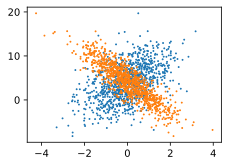

In [99]:
# plot
d2l.set_figsize()
d2l.plt.scatter(features[:, 0].detach().numpy(),
                labels.detach().numpy(), 1)

d2l.plt.scatter(features[:, 1].detach().numpy(),
                labels.detach().numpy(), 1)

## get batch size features and labels data

In [100]:
# get batches of features and labels

def data_iter(batch_size, feature, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)

  for i in range(0, num_examples, batch_size):
    batch_indices =  indices[i:min(i+batch_size, num_examples)]  # torch.tensor(indices[i:min(i+batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  break


tensor([[-0.9577,  2.5527],
        [ 0.2582,  2.2215],
        [-0.4827,  1.3782],
        [-0.0296,  0.9244],
        [ 0.0130,  0.4094],
        [ 1.1187, -0.7034],
        [-2.4462, -0.1018],
        [-1.0960,  1.3296],
        [-0.3861,  1.0317],
        [-0.3263,  1.4412]]) 
 tensor([[-6.3841],
        [-2.8441],
        [-1.4569],
        [ 0.9809],
        [ 2.8170],
        [ 8.8317],
        [-0.3471],
        [-2.5000],
        [-0.0837],
        [-1.3541]])


# linear regression

In [101]:
# initialization
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [102]:
def linreg(X, w, b):
  #linear regression
  return torch.matmul(X, w) + b

def squared_loss(y_hat, y):
  # loss function: squared loss
  # l = (y^ - y)^2/2
  return (y_hat - y.reshape(y_hat.shape))**2/2

def mbgd(params, lr, batch_size):
  # mini-batch gradient descent
  with torch.no_grad():        # iteration process without gradident update
    for para in params:
      para -= lr * para.grad/batch_size
      para.grad.zero_()      # set gradient as 0 again



In [103]:
# training
lr = 0.03       # 0.001 (epochs too low)        10;  (big, out of range nan)
num_epochs = 5
net =linreg
loss = squared_loss
for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    l = loss(net(X, w, b), y)   #  Minibatch loss in `X` and `y`
    l.sum().backward()          # Compute gradient on `l` with respect to [`w`, `b`]
    mbgd([w, b], lr, len(X))         # udpate parameters
  with torch.no_grad():
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')



epoch 1, loss 0.037338
epoch 2, loss 0.000138
epoch 3, loss 0.000050
epoch 4, loss 0.000049
epoch 5, loss 0.000049


In [104]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 8.4639e-06, -6.4325e-04], grad_fn=<SubBackward0>)
error in estimating b: tensor([2.6703e-05], grad_fn=<RsubBackward1>)
